# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Importing libraries

In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Loading data

In [639]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [640]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Except ERA , Which is a float values , all columns are of integer type

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Above have all the information about the columns

In [642]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

There are 17 columns in the dataset

In [643]:
# data has 30 rows and 17 columns
df.shape

(30, 17)

dataset has 30 rows and 17 columns

In [644]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

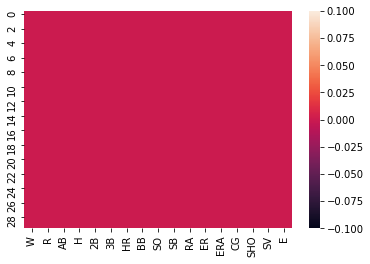

In [645]:
sns.heatmap(df.isnull())

No null values are there
If there were any, you would've noticed in figure represented by different colour shade.

# Summary Statistics

In [646]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


observations : 
Mean , and median are almost normal in each column and std is high in SO,R,AB,H,RA,ER.So, skewness is there. 


In SHO,SV AND E Columns , there is a little difference in 75% and the max value, so there must be outliers

# To Check correlation

In [647]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

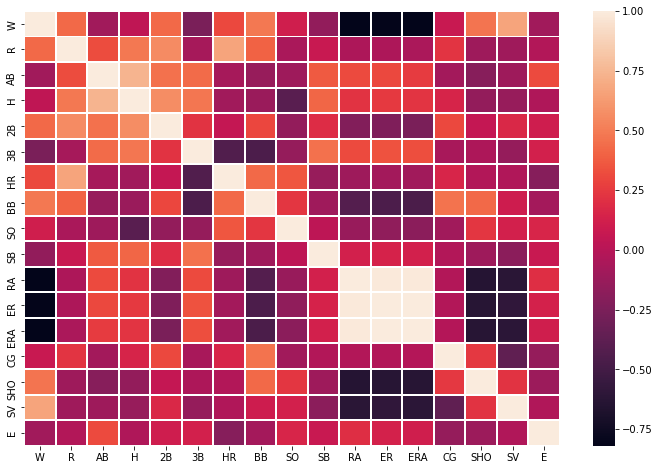

In [648]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,linewidths=1)

<AxesSubplot:>

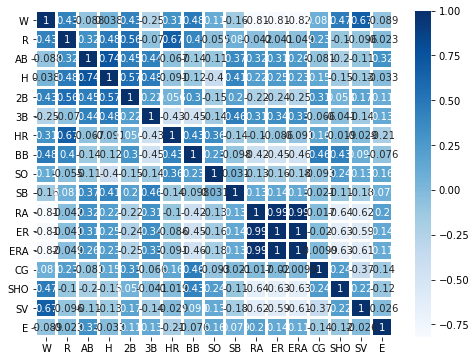

In [649]:
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,cmap='Blues',annot=True,linewidths=2)

<AxesSubplot:>

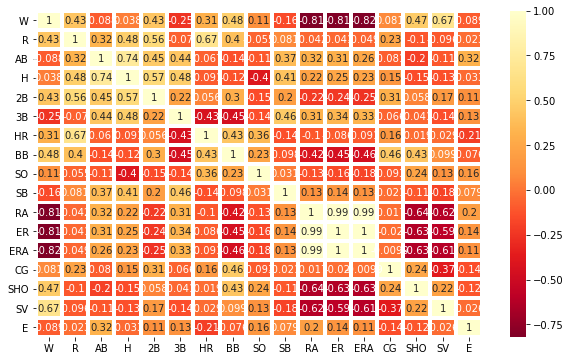

In [650]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True,linewidths=3)

Observations

# univariate analysis 

# Plotting Outliers

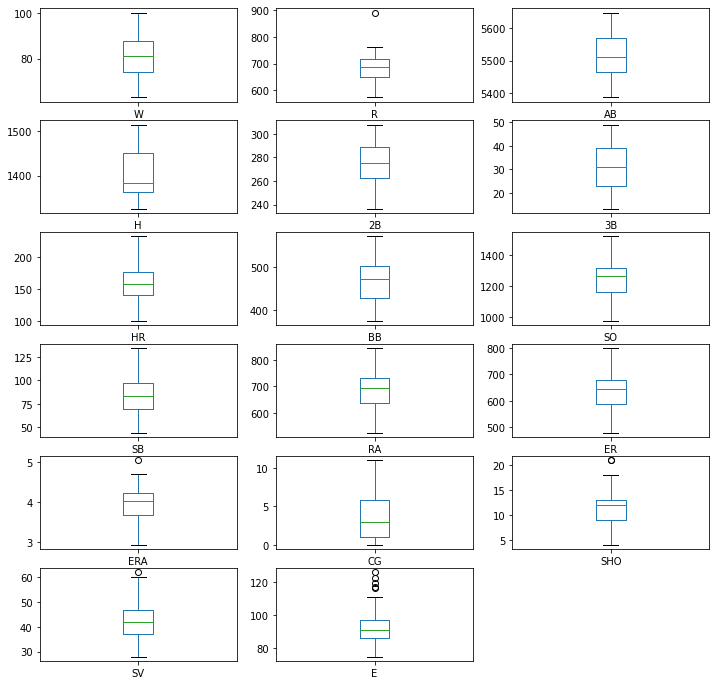

In [651]:
df.plot(kind='box', subplots=True, layout=(6,3), figsize=(12,12))
plt.show()

From the above graph, we can see that outliers are present in the columns namely : E,SV,SHO,ERA and little in R

In [652]:
collist=df.columns.values
ncol=17
nrows=15

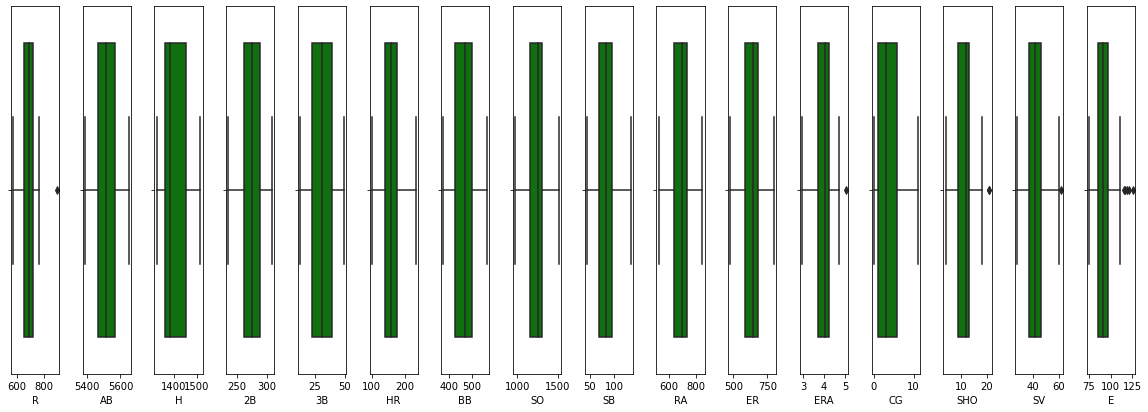

In [653]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From the above graph, we can see that outliers are present in the columns namely : E,SV,SHO,ERA and little in R

# To check Skewness

<AxesSubplot:xlabel='3B', ylabel='Density'>

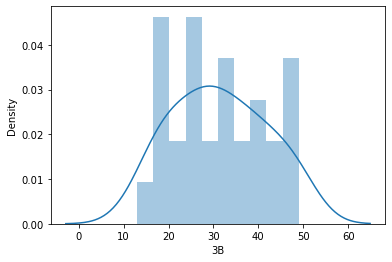

In [654]:
sns.distplot(df['3B'],bins=10)

skewness is not there in 3B

<AxesSubplot:xlabel='AB', ylabel='Density'>

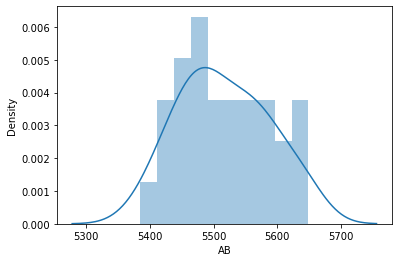

In [655]:
sns.distplot(df['AB'],bins=10)

little bit of skewness is there in AB

<AxesSubplot:xlabel='H', ylabel='Density'>

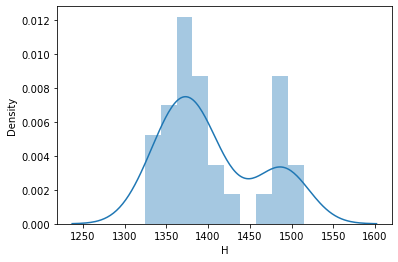

In [656]:
sns.distplot(df['H'],bins=10)

skewness is there in H column

<AxesSubplot:xlabel='ERA', ylabel='Density'>

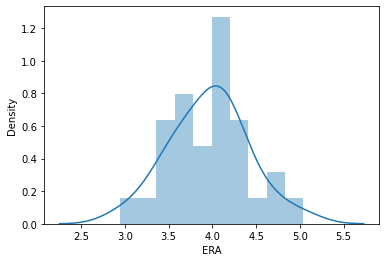

In [657]:
sns.distplot(df['ERA'],bins=10)

No skeness is there in ERA 

<AxesSubplot:xlabel='RA', ylabel='Density'>

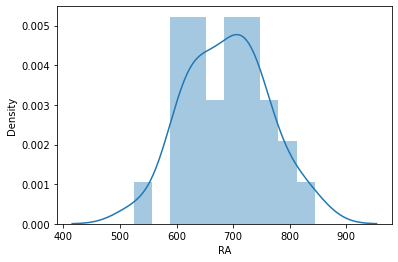

In [658]:
sns.distplot(df['RA'],bins=10)

little skewness is there in RA

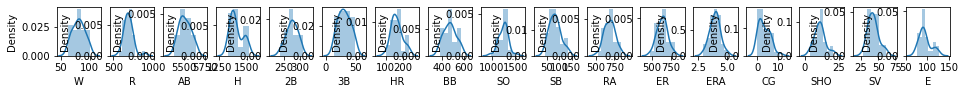

In [659]:
# plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

<AxesSubplot:xlabel='ER', ylabel='Density'>

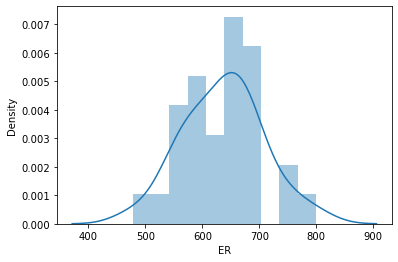

In [660]:
sns.distplot(df['ER'],bins=10)

little skewness is there in ER

observations
Except ERA column, almost all the columns have skewness present

# Bivariate analysis

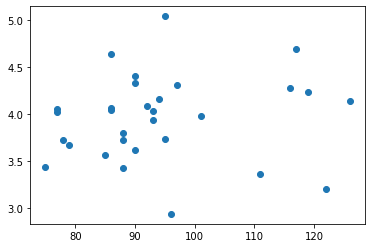

In [661]:
plt.scatter(df['E'],df['ERA'])

E And ERA have a linear relationship

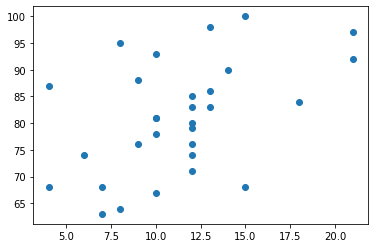

In [662]:
plt.scatter(df['SHO'],df['W'])

SHO And W have a linear relationship but data is collected at centre

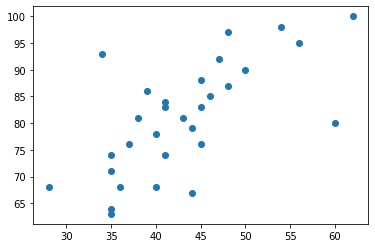

In [663]:
plt.scatter(df['SV'],df['W'])

SV And W have a linear relationship and directly proportional to each other

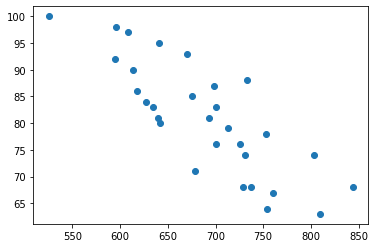

In [664]:
plt.scatter(df['RA'],df['W'])

RA And W have Inversely proportional to each other i.e as RA values is increasing, W is decreasing

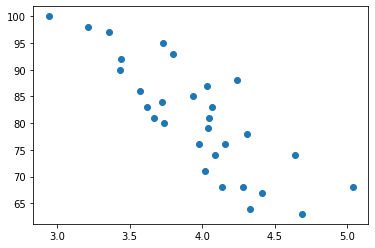

In [665]:
plt.scatter(df['ERA'],df['W'])

ERA And W have Inversely proportional to each other i.e as ERA values is increasing, W is decreasing

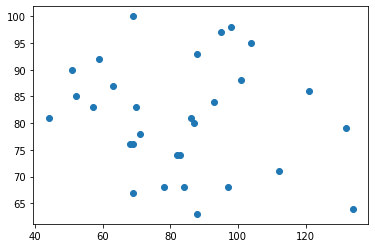

In [666]:
plt.scatter(df['SB'],df['W'])

SB And W have directly proportional to each other and data is located max initially and slow down

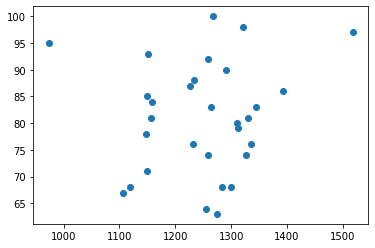

In [667]:
plt.scatter(df['SO'],df['W'])

SO And W have directly proportional to each other

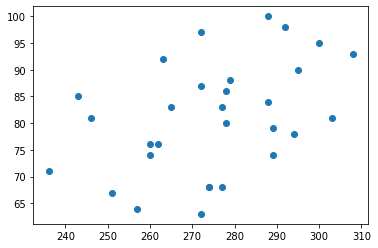

In [668]:
plt.scatter(df['2B'],df['W'])

2B And W have directly proportional to each other

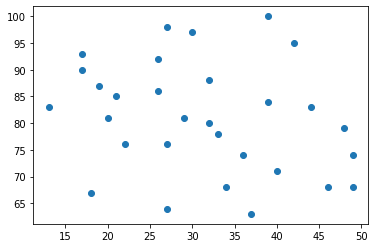

In [669]:
plt.scatter(df['3B'],df['W'])

3B And W have neutral relationship to each other

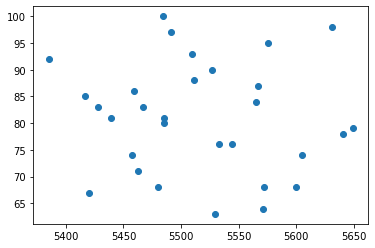

In [670]:
plt.scatter(df['AB'],df['W'])

AB and W have similar kind off neutral relationship..somewhere data is incresing and somewhere data is decreasing

Observations

In [671]:
df=df.drop(['ERA','RA','ER'],axis=1)

In [672]:
df.shape

(30, 14)

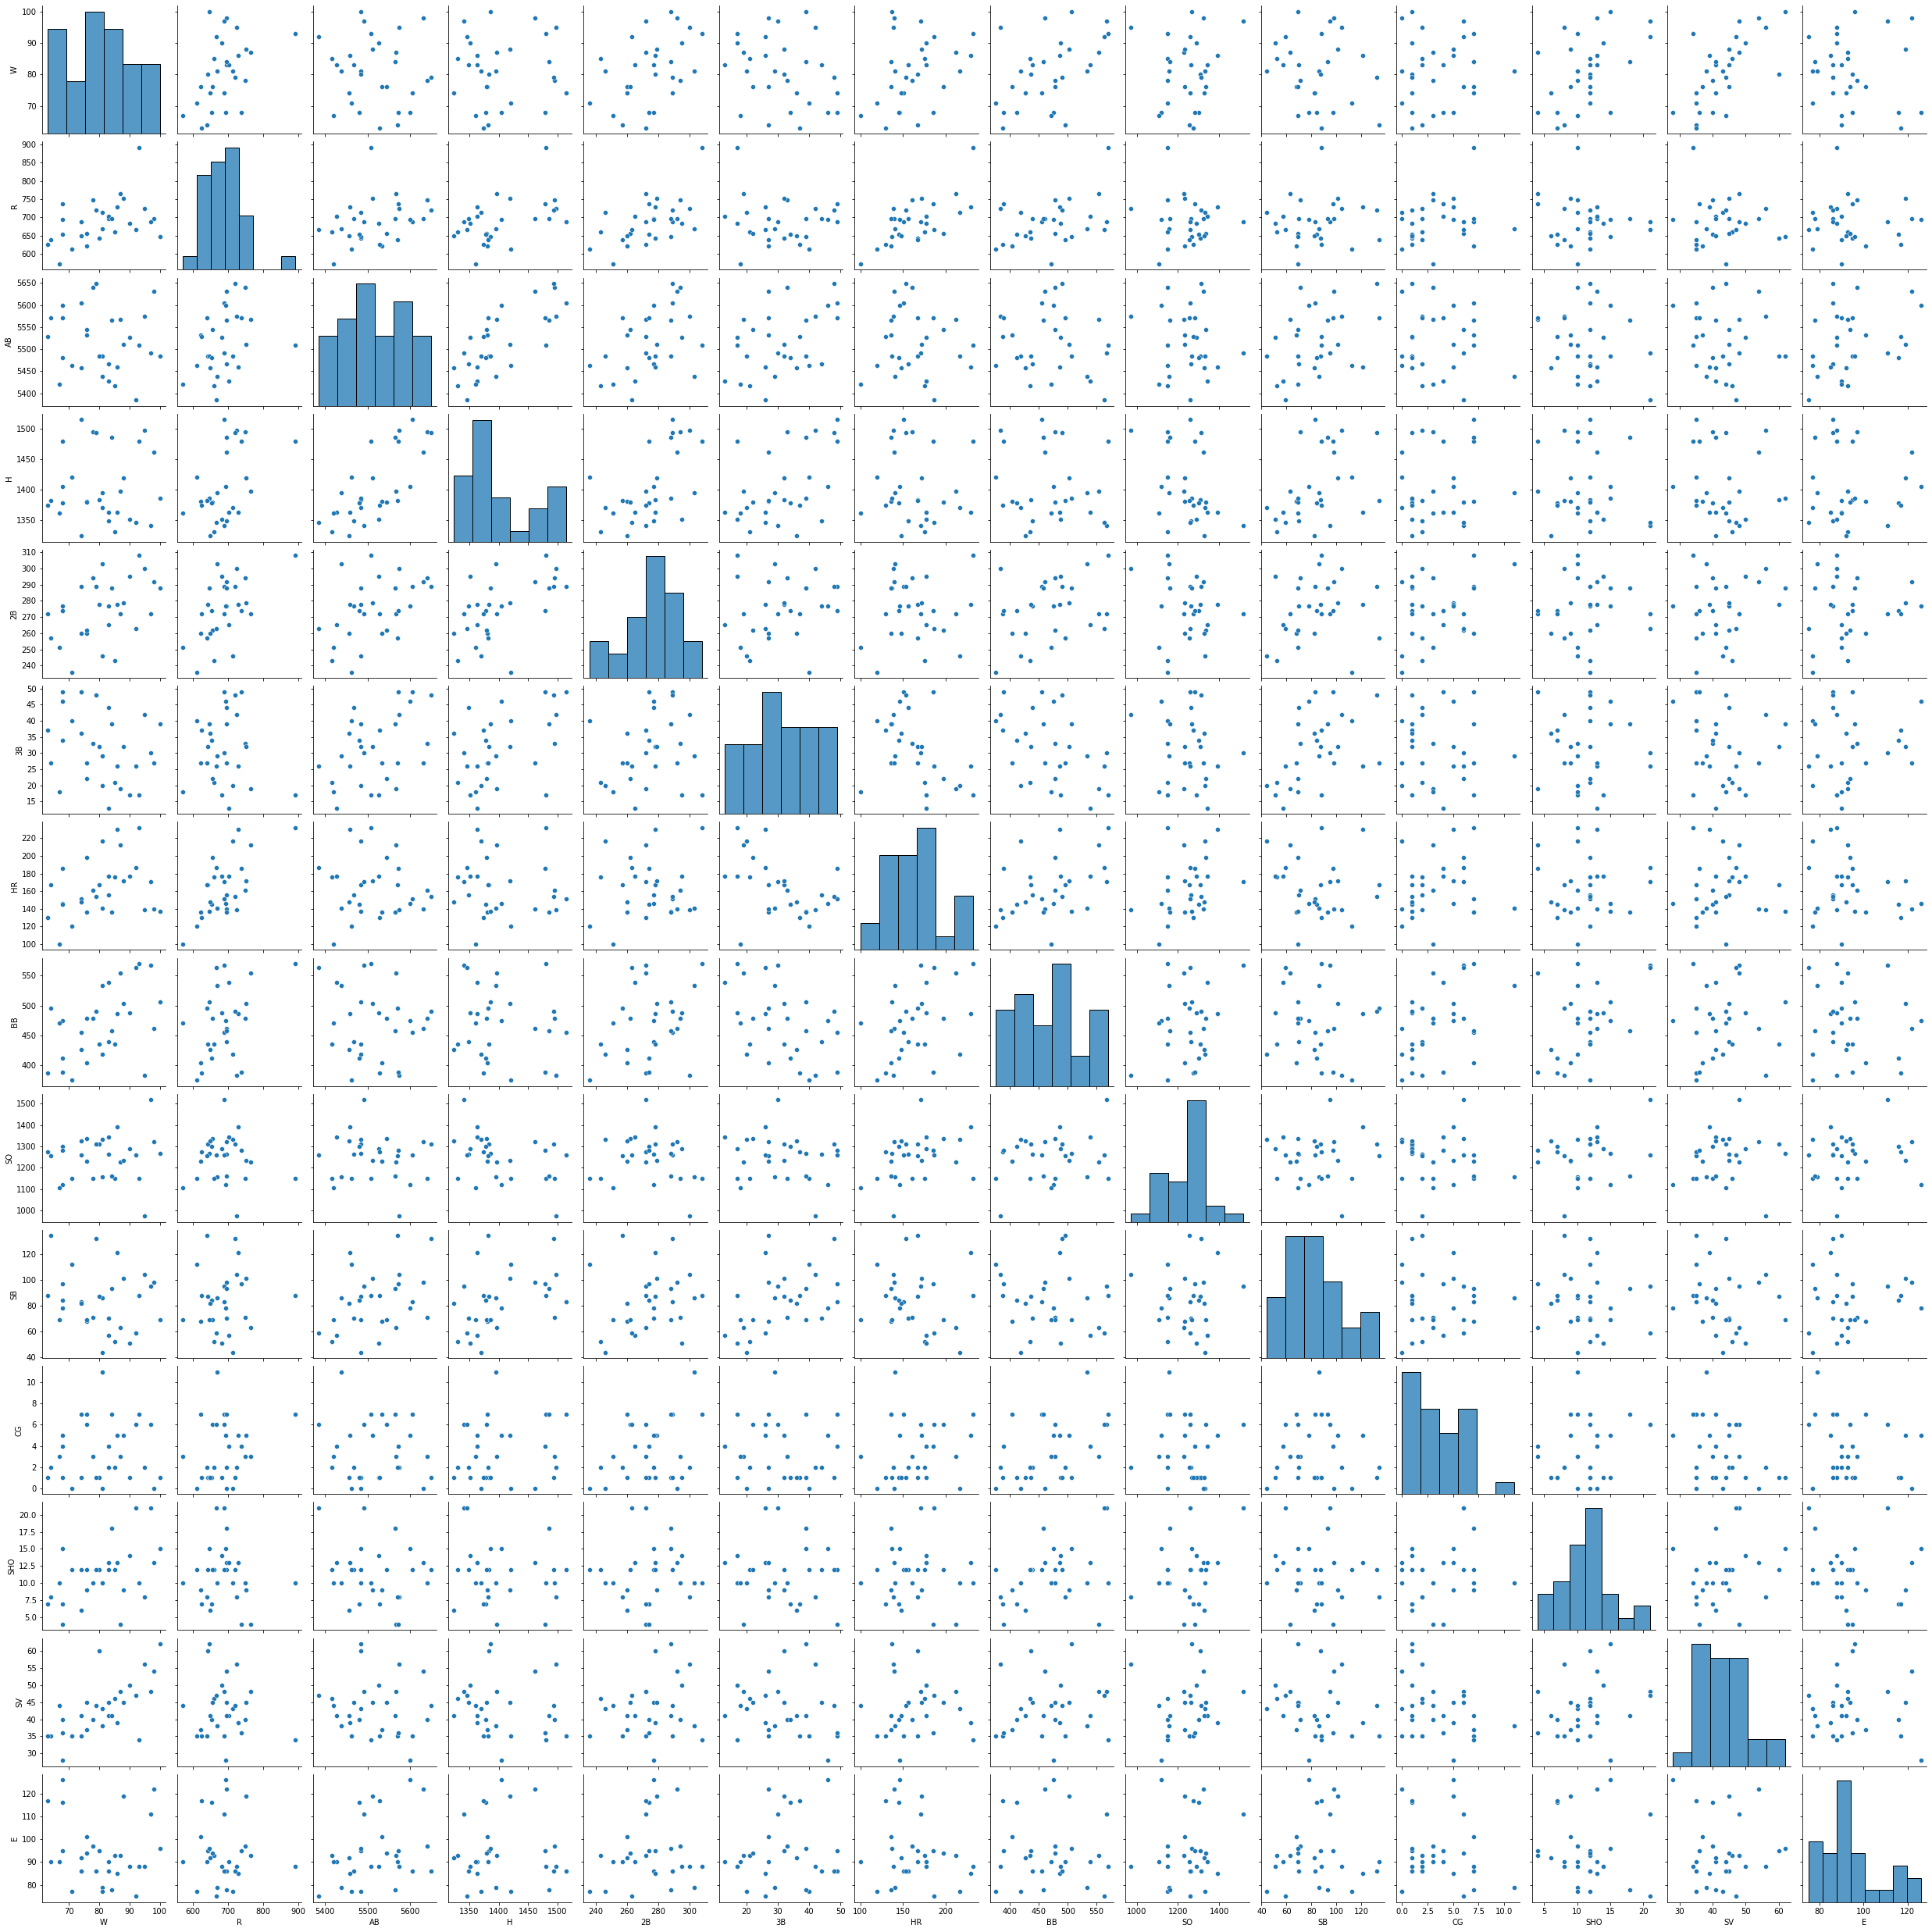

In [673]:
sns.pairplot(df)

# Removing outliers

In [674]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 5.39806195e-01, 8.14628593e-01,
        1.67160651e+00, 4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 5.39806195e-01, 1.72800005e-01,
        2.49879323e-01, 6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 2.77264091e+00, 3.20914294e-01,
        6.54856158e-01, 1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.01088140e-01,
        8.28122030e-01, 4.18423371e-01, 8.83180700e-01, 1.16053598e+00,
        1.68601848e-01, 6.90984928e-01, 1.30044220e+00, 5.67771443e-01,
        7.841

In [675]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [676]:
z[5][1]

3.5096470447193067

In [677]:
# Removing outliers
df_new=df[(z<3).all(axis=1)]

In [678]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


In [679]:
df_new.shape

(29, 14)

In [680]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Seperating independent and target variable into x and y

In [681]:
y = df_new.W
x = df_new.drop('W',axis=1)

In [682]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


In [683]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [684]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [685]:
# In some columns, skewness is present , so, we are removing by power transformation

In [686]:
from sklearn.preprocessing import power_transform
k=power_transform(x)
k=pd.DataFrame(k,columns=x.columns)
k.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.264463,0.236737,-1.149165,-0.540820


In [687]:
k.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [688]:
# Putting k into x
x=k
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.264463,0.236737,-1.149165,-0.540820


In [689]:
# See, here all the skewness have been removed
x.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Successfully removed outliers and skewness

# train_test_split

In [690]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=17)

# Standard scaling

In [691]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Linear Regression

In [692]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [693]:
lm.score(x_train,y_train)

0.8428411833200924

In [694]:
lmpred=lm.predict(x_test)

In [695]:
lm.score(x_test,y_test)

0.6946023605850609

Linear regression score is 70 %

In [696]:
lm.coef_

array([ 4.99158032e+00,  2.22044605e-15,  3.55271368e-15,  1.77015223e+00,
       -1.13501875e+00, -3.49691492e+00, -2.00970000e-01,  3.36205937e+00,
       -2.89909165e-01,  5.62512067e-01,  3.41731857e+00,  5.33220755e+00,
       -5.92664846e-01])

In [697]:
from sklearn.metrics import mean_squared_error,r2_score

In [698]:
print("MSE=",mean_squared_error(y_test,lmpred))

print("R2 score=",r2_score(y_test,lmpred))

MSE= 35.91476239519683
R2 score= 0.6946023605850609


In [699]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.metrics import r2_score

In [700]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [701]:
alpha = lasscv.alpha_
alpha

0.2146609198351505

In [702]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.2146609198351505)

In [703]:
Final_mod=lasso_reg.score(x_test,y_test)
Final_mod*100

73.47263457131014

The lasso score = 74.47 %

# Random Forest Regressor

In [704]:
# Using Random Forest Regressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [705]:
y_rf_pred = reg_rf.predict(x_test)

In [706]:
reg_rf.score(x_train, y_train)

0.8624533035867512

In [707]:
reg_rf.score(x_test, y_test)

0.4278248299319728

In [708]:
from sklearn import metrics
from sklearn.metrics import*
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection  import cross_val_score



# DTR,KNR,SVR,LASSO,RIDGE,ELASTICNET AND LINEAR REGRESSION

In [709]:
#Using algorithms via loop
model = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    
    print('Error:')
    
    print('Mean absolute error:', mean_absolute_error(y_test,predm))
    print('Mean squared error:', mean_squared_error(y_test, predm))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predm)))
    print('r2_score:',r2_score(y_test, predm))
    print('==============================================================================================')
    print('\n')

score of LinearRegression() is: 0.8428411833200924
Error:
Mean absolute error: 5.279315428807284
Mean squared error: 35.91476239519683
Root Mean Squared Error: 5.99289265673905
r2_score: 0.6946023605850609


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 9.9
Mean squared error: 124.3
Root Mean Squared Error: 11.148990985734986
r2_score: -0.05697278911564618


score of KNeighborsRegressor() is: 0.5845889823236656
Error:
Mean absolute error: 7.539999999999999
Mean squared error: 73.97200000000001
Root Mean Squared Error: 8.600697646121505
r2_score: 0.3709863945578231


score of SVR() is: 0.1820159465517357
Error:
Mean absolute error: 9.314905474977577
Mean squared error: 108.29816017811345
Root Mean Squared Error: 10.406640196437726
r2_score: 0.07909727739699446


score of Lasso() is: 0.782792353926691
Error:
Mean absolute error: 4.783343158293552
Mean squared error: 30.343865929343842
Root Mean Squared Error: 5.508526656860602
r2_score: 0.7419739291722462


score o

Score of Linear Regression is 70% and the errors(Mean absolute error:5.279315428807284,Mean squared error: 35.9,Root Mean Squared Error: 35.99 are comparitively low when compared to other models.So,we prefer Linear Regression.

Score of Lasso Regression is 74.19 %

In [710]:
lnr = LinearRegression() 

result_lnr = pd.DataFrame({
    'Actual':y_test,
    'Predict':predm
})
result_lnr['Diff'] = y_test - predm
result_lnr.head()

,Actual,Predict,Diff
0,95,81.135239,13.864761
19,64,74.726788,-10.726788
22,71,70.623370,0.376630
12,85,78.151281,6.848719
6,87,83.304890,3.695110


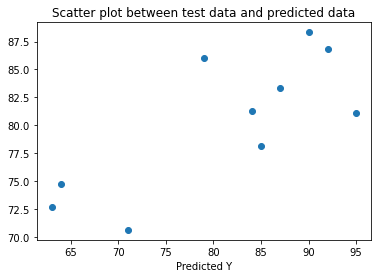

In [711]:
#Plotting scatter plot between test data and predicted data for Linear  Regressor
plt.scatter(y_test,predm)
plt.xlabel('y_test')
plt.xlabel('Predicted Y')
plt.title('Scatter plot between test data and predicted data')
plt.show()

The graph between y_test and Predicted Y line is a straight line for LinearRegression.So,we can say that LinearRegression is working well because it gives the best r2_score and it is also not suffering from overfitting and underfitting.

# Saving the best model in a pickle file

In [712]:
#importing joblib
import joblib

lnr = LinearRegression()
#saving the model in a pickle file
joblib.dump(lnr,'Baseball.pkl')

['Baseball.pkl']